### Test the Simulated Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp
import h5py
import allel
import itertools as it
import pickle as pickle

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
sys.path.append("./python3/") 
from main import HMM_Full
from plot.plot_posterior import plot_posterior, plot_posterior_panel

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

compute-a-16-151.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 32


# Read the simulated data

### Load Data via the Load Object

In [9]:
%%time
h = HMM_Full(folder_in="./output/simulated/undermodel/sim2a/", l_model="simulated", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast",
                 output=True, load=True)
h.t_obj.set_params(ibd_in = 0.0005, ibd_out = 0.001, ibd_jump = 0.05, max_gap=1.0)
post, r_vec, fwd, bwd, tot_ll  = h.run_fwd_bwd()

Minimum Genetic Map: 1.0000 Morgan
Maximum Genetic Map: 1.0000 Morgan
Gaps bigger than 0.1 cM: 0
Maximum Gap: 0.0000 cM
Upper Gap Cutoff: 100.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 120.938496 mB
Total Log likelihood: -26126.161
Fraction Markers above IBD cutoff: 0.1999
Called n=0 IBD Blocks > 4.0 cM
Longest Block: nan cM
CPU times: user 149 ms, sys: 2.86 ms, total: 152 ms
Wall time: 147 ms


In [8]:
r_vec

array([1., 1., 1., ..., 1., 1., 1.])

# Load data the old fashioned way

In [2]:
l = load_loaddata(l_model="simulated", path="./output/simulated/undermodel/sim5/")
htsl, p, r_vec = l.load_all_data()

e = load_emission_model(e_model="haploid_gl")
e_mat = e.give_emission_matrix(htsl, p)
print(np.shape(e_mat))

t = load_transition_model(t_model="standard")
t.set_params(ibd_in = 0.0005, ibd_out = 0.0005, ibd_jump = 0.1, recalculate=False)
t_mat = t.full_transition_matrix(r_vec, n=4, submat33=False)
print(np.shape(t_mat))

(5, 10000)
(10000, 5, 5)


# Run Python Toy FWD-BWD

In [3]:
%%time
fwd_bwd = load_fwd_bwd_func(h_model="FiveState")
post, fwd1, bwd1, tot_ll = fwd_bwd(np.log(e_mat), t_mat, in_val = 1e-4, full=True)

NameError: name 'load_fwd_bwd_func' is not defined

In [11]:
np.sum(np.exp(post), axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

# Fast c functions

In [3]:
%%time
fwd_bwd = load_fwd_bwd_func(h_model="FiveStateFast")
post1, fwd1, bwd1, tot_ll = fwd_bwd(np.log(e_mat), t_mat, in_val = 1e-4, full=True)

Memory Usage Full:
Memory Usage: 121.823232 mB
Total Log likelihood: -26369.094
CPU times: user 27.8 ms, sys: 2.07 ms, total: 29.8 ms
Wall time: 27 ms


### Fast C Function low Memory

In [35]:
%%time
fwd_bwd = load_fwd_bwd_func(h_model="FiveStatLowMem")
dummy = np.zeros((1,1))
post1, fwd1, bwd1, tot_ll = fwd_bwd(np.log(e_mat), t_mat, in_val = 1e-4, full=True)

Total Log likelihood: -26831.980
Memory Usage: 142.241792 mB
CPU times: user 36.6 ms, sys: 915 µs, total: 37.5 ms
Wall time: 34.6 ms


# Plot the posterior

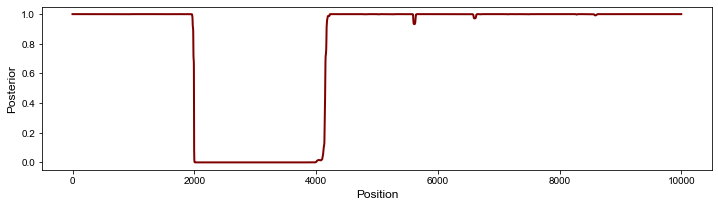

In [4]:
plot_posterior(post=post, state=0, lw=2, fs_l=12)

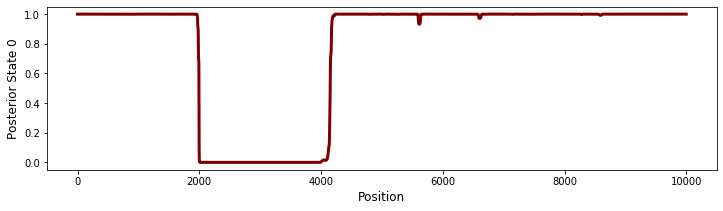

In [23]:
plot_posterior(post1, state=0, lw=3)